# What is in this notebook?

[1. Peek into the Data.](#1)


[2. Wins and Loses](#2)


[3. Nominees and Wins Distributions.](#9)


[4. Years with most and least awards.](#3)


[5. Categories with most and least awards](#4)


[6. Top Nominees.](#5)
- Most nominated artists/albums.
- Time-Series analysis of most nominated Artists/Albums.


[7. Nominees with most awards.](#6)
- Artists with most awards.
- Time-series analysis of Artists with most awards.


[8. Most Awards in a single year.](#7)


[9. Most common workers.](#8)


[10. Hypothesis Testing.](#10)

In [1]:
import pandas as pd ## To work with data.
import numpy as np ## Linear Algebra.
### I am using plotly for data visualization. It has interactive and cool figgures.
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot ## For offline mode.
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS ## For the wordcloud.
import matplotlib.pyplot as plt ##Again, visualizatoin.

In [2]:
## Reading the data
df = pd.read_csv("../input/grammy-awards/the_grammy_awards.csv")

<a class='anchor' id='1'></a>

## Peek into the Data.

In [3]:
df.head() ## Take a look into the data.

,year,category,nominee,workers,winner
0,1959,Album of the Year,The Music from Peter Gunn.,Henry Mancini,True
1,1959,Best Album Cover,Only the Lonely,Frank Sinatra (art director),True
2,1959,Best Arrangement,The Music From Peter Gunn,Henry Mancini (artist/arranger),True
3,1959,Best Classical Performance - Chamber Music (in...,Beethoven: Quartet 130,"The Hollywood String Quartet, Paul Shure (arti...",True
4,1959,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,Andrés Segovia,True


In [4]:
df1 = df[df['winner']==True] ## Dataset about the winners.

<a class='anchor' id='2'></a>

## Wins and looses

In [5]:
temp = df['winner'].value_counts().reset_index()
temp.loc[:,'index'] = ['Winner', 'Not Winner']
fig = go.Figure(data=[
    go.Pie(labels=temp['index'], values=temp['winner'])
])
fig.update_layout(title='Winners amongst nominees')
iplot(fig)

In [6]:
temp = df.groupby(by='year')['winner'].value_counts().unstack().reset_index().fillna(0)
temp.columns
fig = go.Figure(data=[
    go.Scatter(name='Winners', x=temp['year'], y=temp[True]),
    go.Scatter(name='Not Winners', x=temp['year'], y=temp[False])
])
fig.show()

### Insights :
- There have always been more winner nominees than those who could not win the Grammy.
- It has happened 5 times in the history of Grammy Awards that the number of nominees who could not win the award is more than that of the winners. That were in years 1989, 2009, 2015, 2018 and 2019.
- Also this graph shows a positive upward trend, we can say that number of total nominees have incresed with time. Yet there is a slight fluctuation after year 2011, but the upward trend can be seen again from year 2018.

<a class='anchor' id='9'></a>

## Nominees and Wins Distributions

In [7]:
temp1 = df['nominee'].value_counts()
temp2 = df1['nominee'].value_counts().reset_index()
temp2.columns=['Nominee', 'Wins']
temp2['Nominations'] = temp2['Nominee'].apply(lambda x : temp1.loc[x])
temp2 = temp2.astype('object')
temp2 = temp2.groupby(by=['Nominations', 'Wins']).agg('count').reset_index()

fig = px.scatter(temp2, 'Nominations', 'Wins', hover_data=['Nominee'], labels={'Nominee':'Count'})
fig.show()

In [8]:
temp1 = df['nominee'].value_counts()
temp2 = df1['nominee'].value_counts().reset_index()
temp2.columns=['Nominee', 'Wins']
temp2['Nominations'] = temp2['Nominee'].apply(lambda x : temp1.loc[x])
temp2 = temp2.astype('object')

temp1 = temp1.reset_index()
temp3 = temp1.nominee.value_counts().reset_index()
temp4 = temp2.Nominations.value_counts().reset_index()
temp3.sort_values(by='index', inplace=True)
temp4.sort_values(by='index', inplace=True)

fig = go.Figure(data=[
    go.Line(name='Nominations', x=temp3['index'], y=temp3['nominee']),
    go.Line(name='Wins', x=temp4['index'], y=temp4['Nominations'])
])
fig.update_layout(title='Wins and Nominations:')
iplot(fig)

/opt/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Insights:
- Those who have more than 4 nominations have never lost. That means that obviously if someone has been nominated more times than the nominee has chances to win more But, if the nomiee has nominated more than 4 times than the nominee will win in all the nominations.(We can say this by seeing that the number of nominees and number of winners are same in case of more than 5 nominees)
- Also, as the two lines start overlapping after 2 nominations. This says that there is lesser difference in more than 2 times nominees and more than 2 time winners. (This does not mean that most nominees who have been nominated more than twice win the award.)

<a class='anchor' id='3'></a>

## Years with Most and Least Award Categories.

In [9]:
temp = df.groupby(by='year').category.unique().reset_index()
temp.columns=['Year', 'Count']
temp.loc[:,'Count'] = temp.loc[:,'Count'].apply(lambda x : len(x))
temp.sort_values(by='Count', inplace=True)

fig = go.Figure(data=[
    go.Scatter(name='Least Award Categories', x=temp.head()['Year'], y=temp.head()['Count'], mode='markers'),
    go.Scatter(name='Most Award Categories', x=temp.tail()['Year'], y=temp.tail()['Count'], mode='markers')
])
fig.update_layout(title='Years with most and least Award Categories')
iplot(fig)

### Insights:
- There were initially only 34 award Categories introduced in the first Grammy Awards in 1959.
- As time passd by, they kept adding/ Removing the awards according to the need.
- Year 2010 and 2011 introduced most award categories that is, 115 different award categories.

<a class='anchor' id='4'></a>

## Categories with most and least awards.

In [10]:
temp = df.groupby(by='category').year.unique().reset_index()
temp.columns=['Category', 'Count']
temp.loc[:,'Count'] = temp.loc[:,'Count'].apply(lambda x : len(x))
temp.sort_values(by='Count', inplace=True)

fig = go.Figure(data=[
    go.Scatter(name='Least Introduced Award Categories', x=temp.head()['Category'], y=temp.head()['Count'],
              mode='markers'),
    go.Scatter(name='Most Introduced Award Categories', x=temp.tail()['Category'], y=temp.tail()['Count'],
              mode='markers')
])
fig.update_layout(title='Categories with most awards.')
iplot(fig)

### Insights:
- 'Song of the year' is the most introduced category that has been introduced 60 times in the histroy of grammy awards.
- Least introduced categories have actally been introduced only once. Let's see how many of such categories exist.

In [11]:
print('Number of categories that have only introduced once is:',len(temp[temp['Count']==1]))

Number of categories that have only introduced once is: 239


<a class='anchor' id='5'></a>

## Top Nominees

In [12]:
temp = df['nominee'].value_counts().reset_index()
temp.columns = ['Nominee', 'Awards']
temp = temp.head(10)
fig = px.scatter(temp, x='Nominee', y='Awards', color='Awards', size='Awards')
fig.update_layout(title='Most Nominated :')
iplot(fig)

In [13]:
top_category = temp['Nominee'].tolist()

temp = df[df['nominee'].isin(top_category)].groupby(by=['nominee','year'])['year'].count().unstack().fillna(0)
temp = temp.T.cumsum().reset_index()
value_list = list(temp.columns)[1:]
temp = pd.melt(temp, id_vars='year', value_vars=value_list)

fig = px.scatter(temp, x='nominee', y='value', size='value', animation_frame='year',range_y=[0,10], color='nominee')
fig.update_layout(showlegend=False, title='Total Nomiations of top nominees throught the history of Grammy:')
iplot(fig)

<a class='anchor' id='6'></a>

## Nominees with most awards

In [14]:
temp = df1['nominee'].value_counts().reset_index()
temp.columns = ['nominee', 'Awards']
temp = temp.iloc[:10,:]
fig = px.scatter(temp, x='nominee', y='Awards', color='Awards', size='Awards')
fig.update_layout(title='Nominees with most awards:')
iplot(fig)

In [15]:
top_category = temp['nominee'].tolist()
temp = df1[df1['nominee'].isin(top_category)].groupby(by=['nominee','year'])['year'].count().unstack().fillna(0)
temp = temp.T.cumsum().reset_index()
value_list = list(temp.columns)[1:]

temp = pd.melt(temp, id_vars='year', value_vars=value_list)
fig = px.scatter(temp, x='nominee', y='value', size='value', animation_frame='year',range_y=[0,10], color='nominee')
fig.update_layout(showlegend=False, title='Total Awards of top nominees throught the history of Grammy:')
iplot(fig)

<a class='anchor' id='7'></a>

## Most Awards in a single year.

In [16]:
temp = df1.groupby(by=['nominee', 'year'])['year'].count().unstack().fillna(0).stack().sort_values(ascending=False)
temp = temp.reset_index().head()
temp.columns=['Nominee', 'Year', 'Awards']
print('Nominee with most awards in a single year: ')
temp

Nominee with most awards in a single year: 


,Nominee,Year,Awards
0,Bridge Over Troubled Water,1971,6.0
1,"Up, Up And Away",1968,6.0
2,Need You Now.,2011,5.0
3,King Of The Road,1966,5.0
4,A Taste Of Honey,1966,4.0


<a class='anchor' id='8'></a>

## Most common workers.

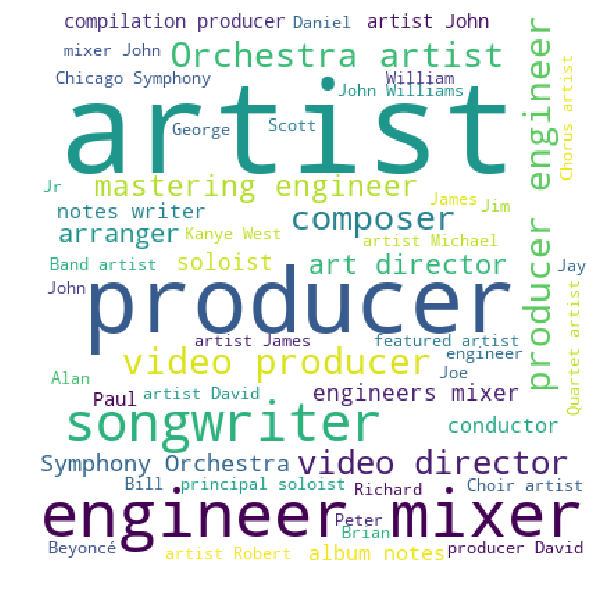

In [17]:
comment_words = ' '.join(df['workers'].dropna().tolist())

fig = WordCloud(width=400, height=400, stopwords=STOPWORDS, background_color='white',
         min_font_size=10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(fig) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<a class='anchor' id='10'></a>

## Hypothesis Testing

In [18]:

temp = pd.merge(temp1, temp2.drop(columns='Nominations'), how='outer',
                left_on='index', right_on='Nominee').drop(columns='Nominee')
temp.fillna(0, inplace=True)
temp_new = temp.astype('object')
temp_pivot = pd.pivot_table(temp_new, index='nominee', columns='Wins', aggfunc='count').fillna(0)
temp_pivot.columns = temp_pivot.columns.droplevel()

temp_pivot['Wins'] = temp_pivot.iloc[:,1:].sum(axis=1)
temp_pivot = temp_pivot.iloc[:,[0,8]]
temp_pivot['Total'] = temp_pivot.sum(axis=1)
temp_pivot['Lose_Per'] = temp_pivot.iloc[:,0]/temp_pivot['Total']
temp_pivot['Win_Per'] = temp_pivot.iloc[:,1]/temp_pivot['Total']
temp_pivot = temp_pivot.iloc[:,[3,4]]

temp_pivot.reset_index(inplace=True)

In [19]:
temp_pivot

Wins,nominee,Lose_Per,Win_Per
0,1,0.342240,0.657760
1,2,0.113253,0.886747
2,3,0.051546,0.948454
3,4,0.000000,1.000000
4,5,0.000000,1.000000
5,6,0.000000,1.000000
6,7,0.000000,1.000000


In [20]:
temp_pivot.corr()

Wins,nominee,Lose_Per,Win_Per
Wins,,,
nominee,1.000000,-0.796309,0.796309
Lose_Per,-0.796309,1.000000,-1.000000
Win_Per,0.796309,-1.000000,1.000000


### Winning percentage has high correlation with number of nominations. Artists who are nominated more have higher chances of winning an award.